# Thrombin ligands for pharmacophore identification

We explore thrombing ligands that will be used to create ligand-based pharmacophore models

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
import openpharmacophore as oph
from pprint import pprint
import nglview as nv

## Load  and visualize ligands

We load the ligands from their respective smiles and draw their molecular structures

In [2]:
lig_df = pd.read_csv("ligands.csv")
lig_df

,Smiles,PDBID,LigID
0,[H]/N=C(\C1CCC(CC1)CNC(=O)[C@@H]2C=C(CN3N2C(=O...,1C4V,IH2
1,CN[C@H](Cc1ccccc1)C(=O)N2CCC[C@H]2C(=O)NCC3CCC...,1TOM,MIN
2,c1ccc(cc1)S(=O)(=O)CCN2C(=O)N3CC=C[C@H](N3C2=O...,1D6W,00R
3,c1ccc(cc1)S(=O)(=O)CCN2C(=O)N3CC=C[C@H](N3C2=O...,1D91,00P
4,[H]/N=C(/c1ccc(cc1)C[C@H](C(=O)N2CCCCC2)NC(=O)...,1DWD,MID
5,[H]/N=C(\c1ccc2c(c1)cc([nH]2)C(=O)N3CCC(CC3)Cc...,1D4P,BPP


In [3]:
def load_ligands():
    """ Load the ligands into a list of rdkit molecules."""
    ligands = []
    for smi in lig_df["Smiles"]:
        mol = Chem.MolFromSmiles(smi.encode("unicode_escape"))
        assert mol is not None
        ligands.append(mol)
    
    supp = Chem.SDMolSupplier("0ZI.sdf")
    mol = next(supp)
    mol.RemoveAllConformers()
    ligands.append(mol)

    print(f"Num ligands: {len(ligands)}")
    
    return ligands

Num ligands: 7


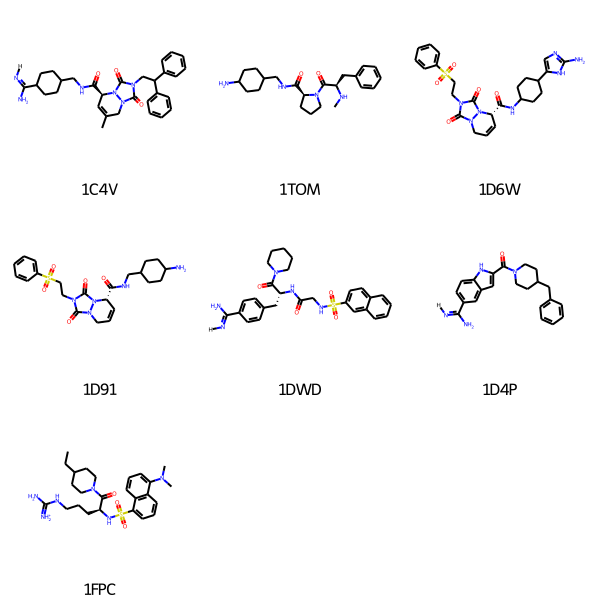

In [4]:
ligands = load_ligands()
legends = [l for l in lig_df["PDBID"]] + ["1FPC"]
Draw.MolsToGridImage(ligands, legends=legends)

## Preparing the ligands

We'll generate different conformers for each of the ligands and add hydrogens to them
as well.

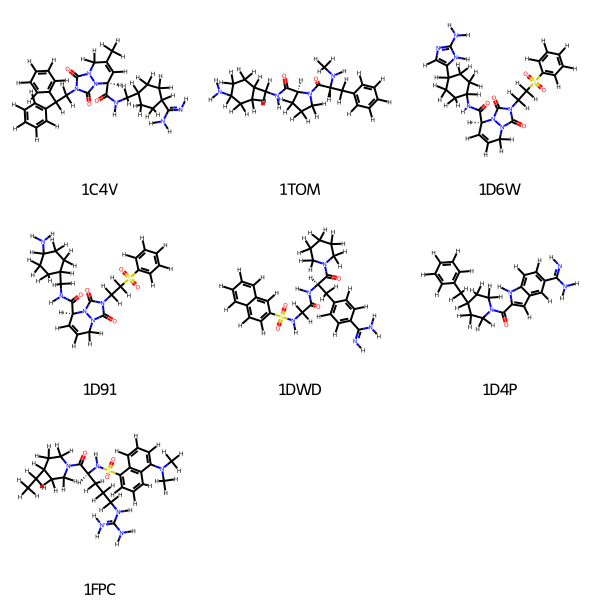

In [5]:
# Add hydrogens and draw them again

pharmacophore = oph.LigandBasedPharmacophore()
pharmacophore.ligands = ligands
pharmacophore.add_hydrogens(ligands="all")

Draw.MolsToGridImage(pharmacophore.ligands, legends=legends)

In [6]:
pharmacophore.generate_conformers(ligands="all", n_confs=10)

## View 3D structures

In [13]:
index = 6
nv.show_rdkit(pharmacophore.ligands[index])

NGLWidget()

## Extracting common pharmacophores

We extract common pharmacophores via recursive distance partitioning algorithm